In [1]:
import pandas as pd
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import AllChem
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('data/final_data_after_pipeline.csv')
print(df.is_solved.value_counts())
df = df[df.steps > 0]
df = df.drop_duplicates(subset=['smiles'])
print(df.is_solved.value_counts())
df.steps.value_counts()

True     5001
False    4926
Name: is_solved, dtype: int64
True     5001
False    4744
Name: is_solved, dtype: int64


1     2088
2     1396
13    1142
12    1043
11     637
3      636
4      483
10     448
5      426
9      372
6      366
8      356
7      352
Name: steps, dtype: int64

In [3]:
df.head()

,smiles,orig_smiles,steps,orig_index,is_solved,pipeline_status,syba_score,syba,sa,sc
0,Cc1ncc(COP(=O)(O)O)c(C=O)c1O,Cc1ncc(COP(=O)(O)O)c(C=O)c1O,1,0,True,no_warn,23.635963,23.635963,2.979265,2.881520
1,CC(=O)C(=O)O,CC(=O)C(=O)O,1,1,True,no_warn,2.978129,2.978129,1.841613,1.361031
2,C[N+](C)(C)CCO,C[N+](C)(C)CCO,1,2,True,no_warn,20.562749,20.562749,3.003778,1.000185
3,NCCCNCCCCNCCCN,NCCCNCCCCNCCCN,1,3,True,no_warn,-14.811037,-14.811037,2.178531,2.000314
4,O=C(O)CCC(=O)O,O=C(O)CCC(=O)O,1,4,True,no_warn,5.412548,5.412548,1.608031,1.517970


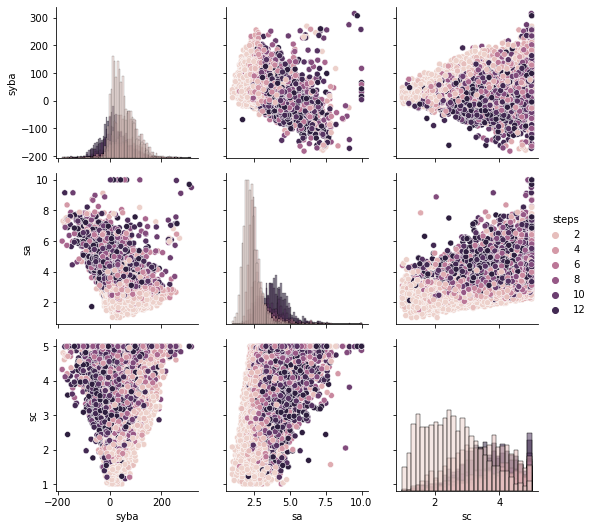

In [4]:
g = sns.PairGrid(df[['steps', 'syba', 'sa', 'sc']], hue='steps')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

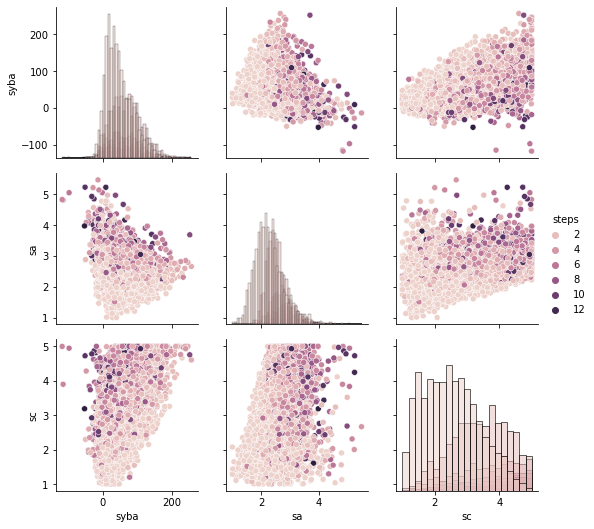

In [5]:
df['steps_bins'] = pd.cut(df['steps'], [0,1,2,13], labels=range(3))
df.steps_bins.value_counts()
df_solved = df[df.is_solved]

g = sns.PairGrid(df_solved[['steps', 'syba', 'sa', 'sc']], hue='steps')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

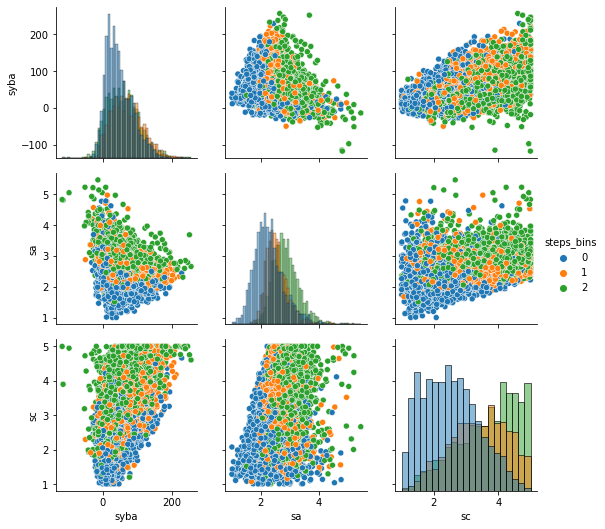

In [6]:
g = sns.PairGrid(df_solved[['steps_bins', 'syba', 'sa', 'sc']], hue='steps_bins')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

Text(0.5, 1.0, 'Histogram number of steps solved binned')

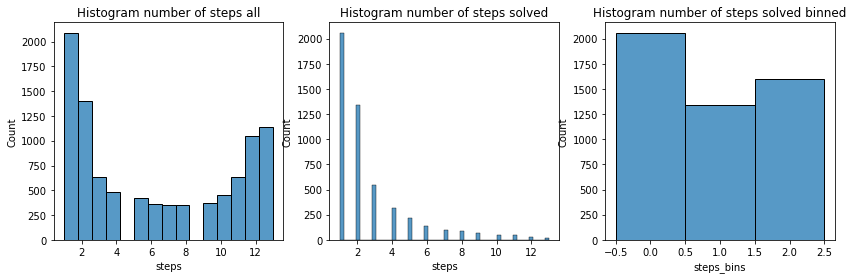

In [7]:
plt.figure(figsize=(14,4))
plt.subplot(131)
sns.histplot(x=df.steps)
plt.title('Histogram number of steps all')

plt.subplot(132)
sns.histplot(x=df_solved.steps)
plt.title('Histogram number of steps solved')

plt.subplot(133)
sns.histplot(x=df_solved.steps_bins)
plt.title('Histogram number of steps solved binned')

In [8]:
mols = [Chem.MolFromSmiles(smi) for smi in df.smiles]
mfps = [AllChem.GetMorganFingerprintAsBitVect(mol, 2) for mol in mols]
pca = PCA()
pca_mfps = pca.fit_transform(mfps)

In [9]:
df_pca_mfps = pd.DataFrame({'PC1':pca_mfps[:,0], 'PC2':pca_mfps[:,1], 'is_solved': df.is_solved,
                           'steps':df.steps, 'steps_bins': df.steps_bins})
df_pca_mfps_solved = df_pca_mfps[df_pca_mfps.is_solved] 

Text(0.5, 1.0, 'PCA mfps solved, colored by steps')

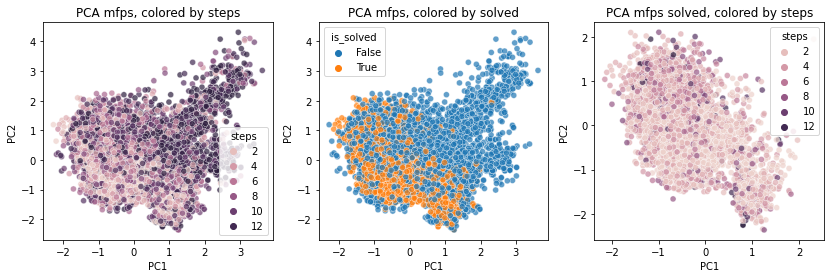

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(131)
sns.scatterplot(x=df_pca_mfps.PC1, y=df_pca_mfps.PC2, hue=df_pca_mfps.steps, alpha=0.7)
plt.title('PCA mfps, colored by steps')

plt.subplot(132)
sns.scatterplot(x=df_pca_mfps.PC1, y=df_pca_mfps.PC2, hue=df_pca_mfps.is_solved, alpha=0.7)
plt.title('PCA mfps, colored by solved')

plt.subplot(133)
sns.scatterplot(x=df_pca_mfps_solved.PC1, y=df_pca_mfps_solved.PC2, hue=df_pca_mfps.steps, alpha=0.7)
plt.title('PCA mfps solved, colored by steps')